# ***Import Libraries and Dataset***

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch

from sklearn.svm import SVC
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier  
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor

#Sisporto J. Matern. Fetal Medicine & cardiotocograms
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [8]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [9]:
data = pd.read_csv('/content/gdrive/MyDrive/fetal_health.csv')

In [10]:
data

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


# ***Preprocessing***

In [11]:
df = data.copy()

#Problem: Duplicate Values
#In this, multiple rows will be dropped
df.drop_duplicates(inplace=True)

#Problem: NULL values
#In this, multiple rows will be dropped
df= df.dropna()

#Problem: Missing Values
#In this, the missing values are replaced with the mean
imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
imputer = imputer.fit(df[['accelerations']])
df['accelerations'] = imputer.transform(df[['accelerations']])

In [12]:
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [13]:
CLASSES =  ["NORMAL", "SUSPECT", "PATHOLOGICAL"]

# ***Correlation Matrix***

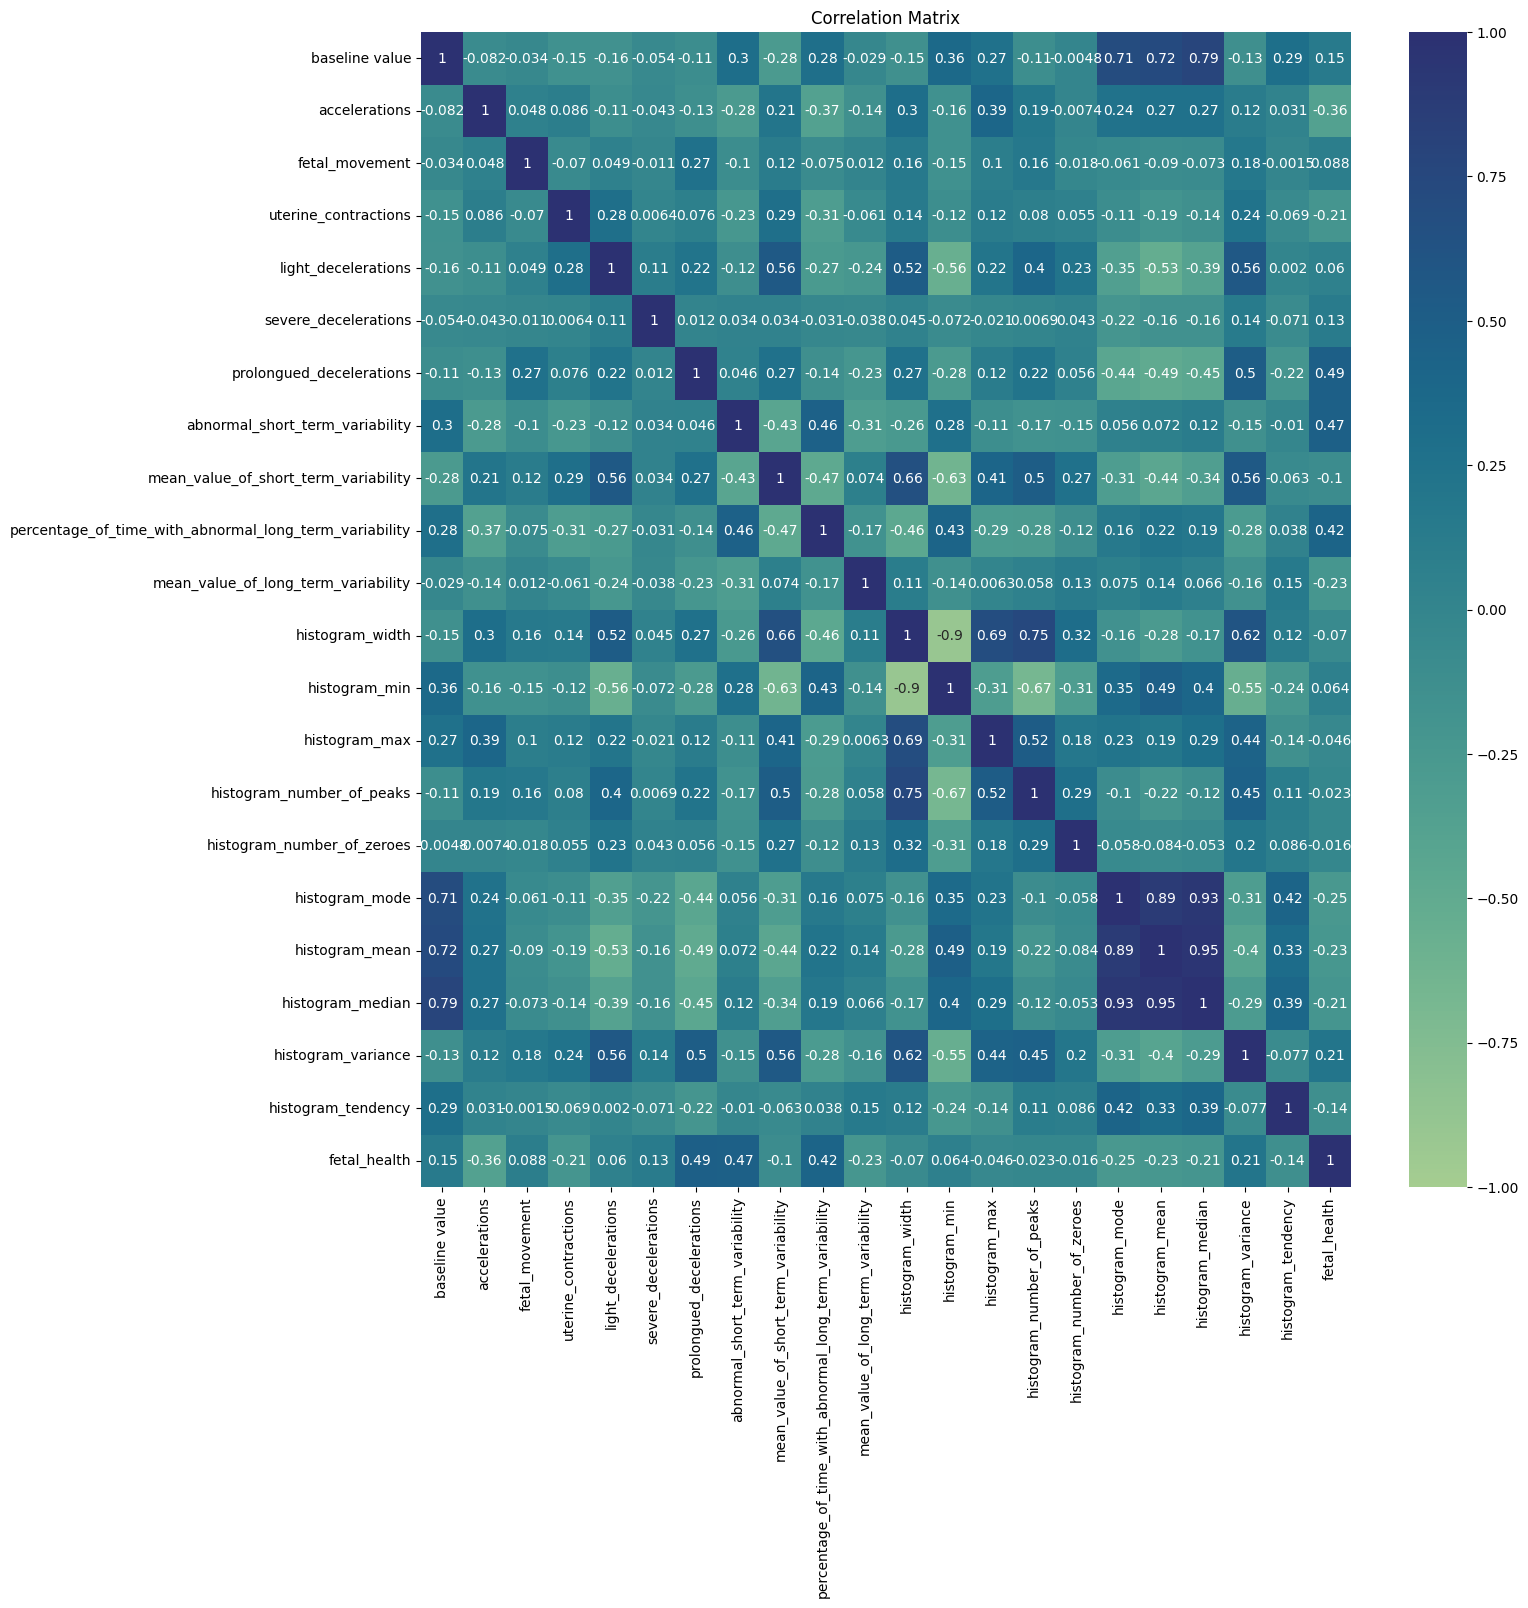

In [14]:
#Correlation Matrix using heatmap from seaborn

corr = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot = True, vmin=-1, vmax=1, cmap='crest')
plt.title("Correlation Matrix")
plt.show()

# ***Bar Chart Representation of Output Classes***

Text(0.5, 1.0, 'Bar Chart Representation of 3 Output Classes')

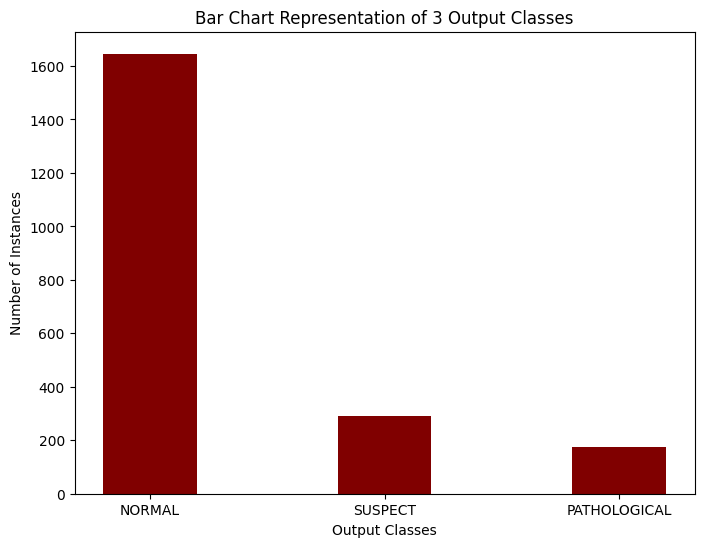

In [15]:
#Representing the Imbalanced Dataset

plt.figure(figsize=(8,6))
plt.bar(
    CLASSES,
    df['fetal_health'].value_counts(),
    width = 0.4,
    color = "maroon"
)

plt.xlabel("Output Classes")
plt.ylabel("Number of Instances")

plt.title("Bar Chart Representation of 3 Output Classes")

# ***Feature Scaling***

In [16]:
# X = feature values, all the columns except the last column
X = df.iloc[:, :-1]

# y = target values, last column of the data frame
y = df.iloc[:, -1]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)

In [18]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1479, 21)
y_train shape: (1479,)
X_test shape: (634, 21)
y_test shape: (634,)


In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ***Model 1: Logistic Regression***

In [20]:
logistic = LogisticRegression()
logistic.fit(X_train_scaled, y_train) 
y_pred_1 = logistic.predict(X_test_scaled)

A1 = np.mean(y_pred_1 == y_test)*100
print("Logistic Regression Prediction Accuracy: {:.2f} %".format(A1))

Logistic Regression Prediction Accuracy: 90.22 %


# ***Model 2: K-Nearest Neighbors***

In [21]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train) 
y_pred_2 = knn.predict(X_test_scaled)

A2 = np.mean(y_pred_2 == y_test)*100
print("KNN Prediction Accuracy: {:.2f} %".format(A2))

KNN Prediction Accuracy: 89.91 %


# ***Model 3: Naive Bayes***

In [22]:
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
y_pred_3 = gnb.predict(X_test_scaled)

A3 = np.mean(y_pred_3 == y_test)*100
print("Naive Bayes Prediction Accuracy: {:.2f} %".format(A3))

Naive Bayes Prediction Accuracy: 71.92 %


# ***Model 4: Decision Tree***

Decision Tree Prediction Accuracy: 93.22 %


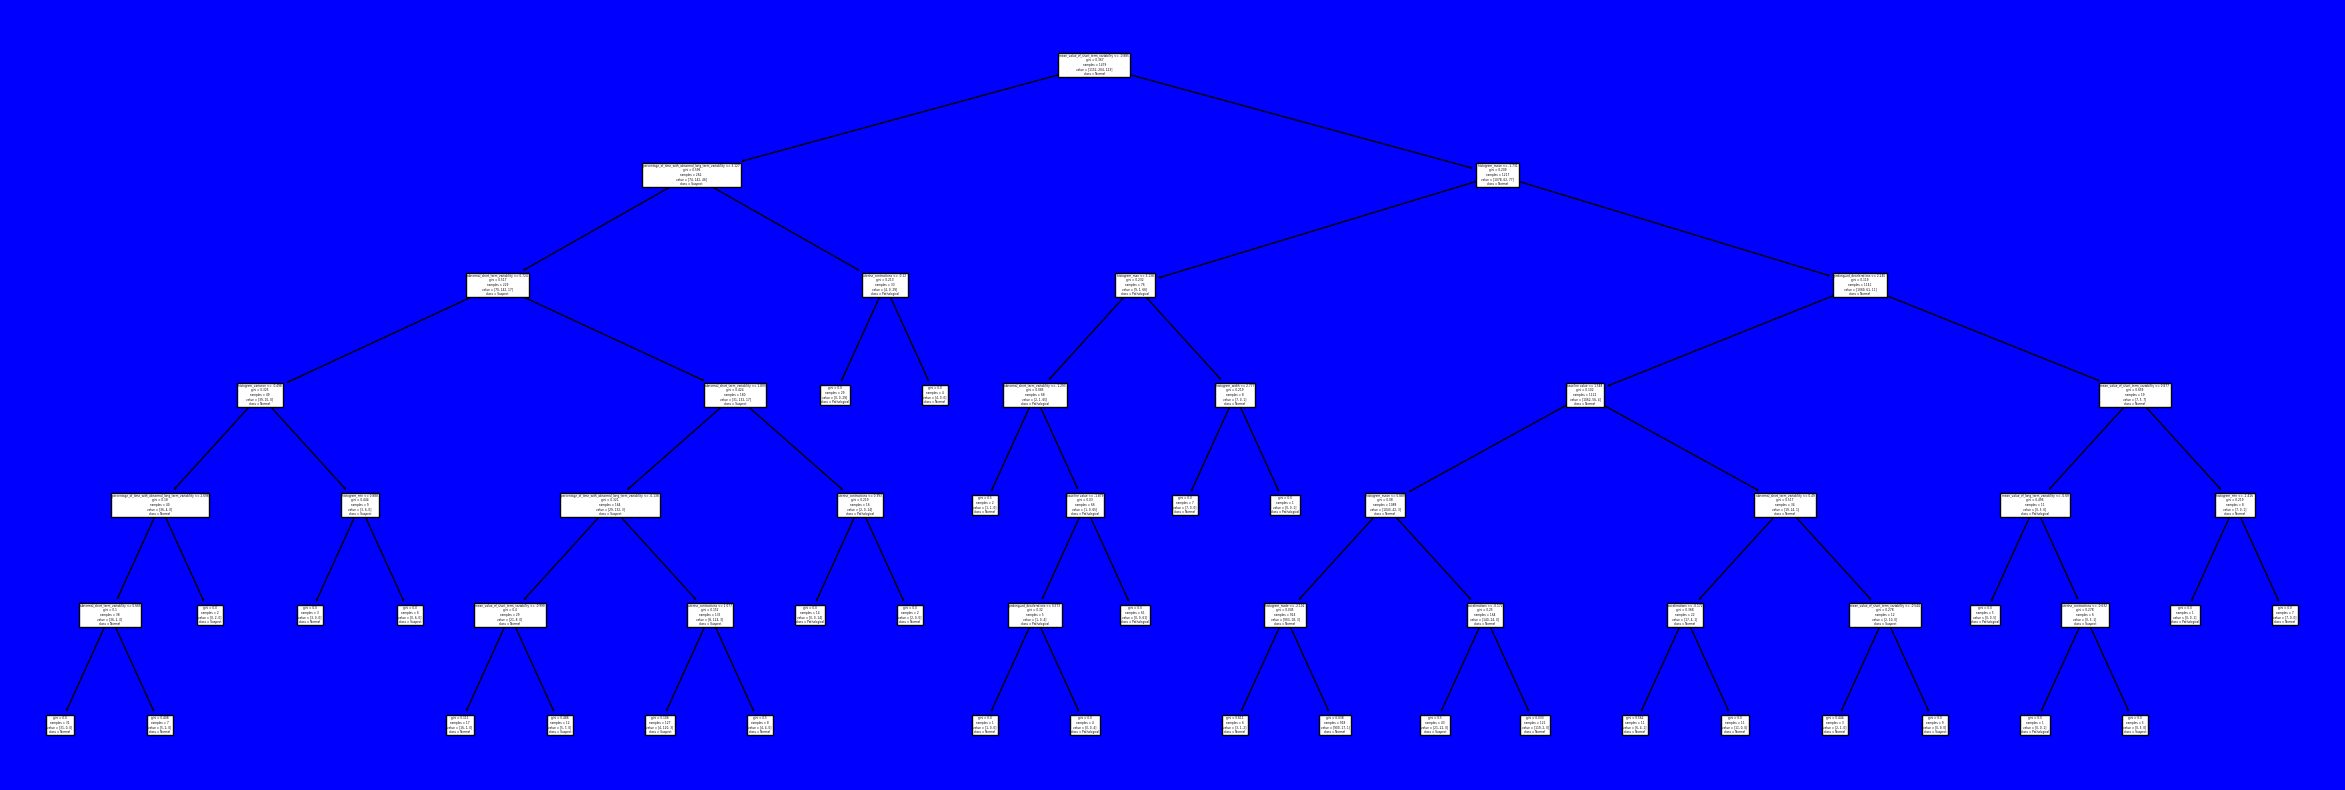

In [23]:
dtree =  DecisionTreeClassifier(max_depth = 6, random_state = 0)  
#when max_depth is 6, we get maximum prediction accuracy
dtree.fit(X_train_scaled, y_train)
y_pred_4 = dtree.predict(X_test_scaled)

A4 = np.mean(y_pred_4 == y_test)*100
print("Decision Tree Prediction Accuracy: {:.2f} %".format(A4))

feature_names=df.columns.values.tolist()
plt.figure(figsize = (30, 10), facecolor = 'b')
target_labels=['Normal','Suspect','Pathological']
Tree = tree.plot_tree(dtree, feature_names=feature_names, class_names=target_labels)
plt.show() 

# ***Model 5: Neural Network***

In [24]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=0)
clf.fit(X_train_scaled, y_train)
y_pred_5 = clf.predict(X_test_scaled)

A5 = np.mean(y_pred_5 == y_test)*100
print("Neural Network Prediction Accuracy: {:.2f} %".format(A5))

Neural Network Prediction Accuracy: 91.32 %


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


# ***Model 6: Support Vector Machine***

In [25]:
svc = SVC(kernel='linear')
svc.fit(X_train_scaled, y_train)
y_pred_6 = svc.predict(X_test_scaled)

A6 = np.mean(y_pred_6 == y_test)*100
print("Support Vector Machine Prediction Accuracy: {:.2f} %".format(A6))

Support Vector Machine Prediction Accuracy: 90.38 %


# ***Bar Chart for Prediction Accuracy of Models***

Text(0.5, 1.0, 'Bar Chart for Prediction Accuracies')

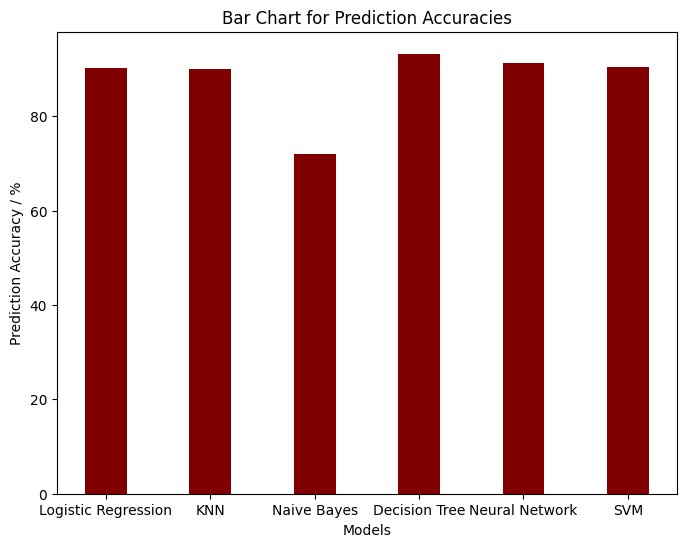

In [26]:
plt.figure(figsize=(8,6))
plt.bar(
    ["Logistic Regression", "KNN", "Naive Bayes", "Decision Tree", "Neural Network", "SVM"],
    [A1, A2, A3, A4, A5, A6],
    width = 0.4,
    color = "maroon"
)

plt.xlabel("Models")
plt.ylabel("Prediction Accuracy / %")

plt.title("Bar Chart for Prediction Accuracies")

# ***Precision-Recall Comparisons***

In [27]:
c = 0
def precision_recall(pred):
  global c
  c += 1
  precision, recall, fscore, support = score(y_test, pred, average='macro')
  if c==1:
    print("Logistic Regression")
  elif c==2:
    print("K-Nearest Neighbor")
  elif c==3:
    print("Naive Bayes")
  elif c==4:
    print("Decision Tree")
  elif c==5:
    print("Neural Network")
  else:
    print("Support Vector Machine")

  print('Precision : {:.2f}'.format(precision*100), "%")
  print('Recall    : {:.2f}'.format(recall*100), "%")
  print("")

precision_recall(y_pred_1)
precision_recall(y_pred_2)
precision_recall(y_pred_3)
precision_recall(y_pred_4)
precision_recall(y_pred_5)
precision_recall(y_pred_6)

Logistic Regression
Precision : 82.72 %
Recall    : 79.12 %

K-Nearest Neighbor
Precision : 85.40 %
Recall    : 77.07 %

Naive Bayes
Precision : 66.56 %
Recall    : 74.39 %

Decision Tree
Precision : 89.69 %
Recall    : 87.69 %

Neural Network
Precision : 83.41 %
Recall    : 82.20 %

Support Vector Machine
Precision : 82.43 %
Recall    : 79.19 %



# ***Confusion Matrix Comparisons***

In [28]:
d = 0
def confusionMatrix(y_pred):
    cf_matrix = confusion_matrix(y_test, y_pred)
    global d
    d += 1
    if d==1:
      print("Logistic Regression")
    elif d==2:
      print("K-Nearest Neighbor")
    elif d==3:
      print("Naive Bayes")
    elif d==4:
      print("Decision Tree")
    elif d==5:
      print("Neural Network")
    else:
      print("Support Vector Machine")

    x_axis_labels = [1.0, 2.0, 3.0] 
    y_axis_labels = [1.0, 2.0, 3.0] 
    s = sns.heatmap(cf_matrix, annot = True, cmap="viridis", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
    s.set(xlabel='Predicted', ylabel='Test')

Logistic Regression


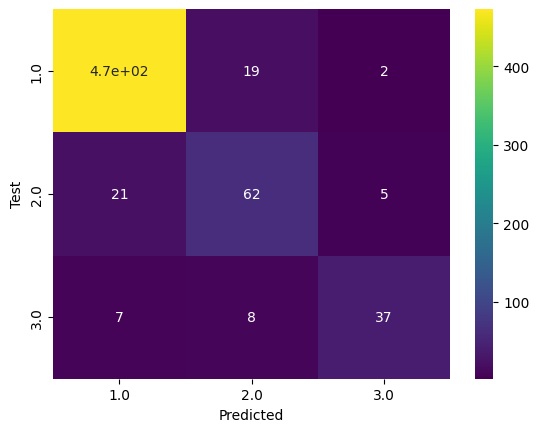

In [29]:
confusionMatrix(y_pred_1)

K-Nearest Neighbor


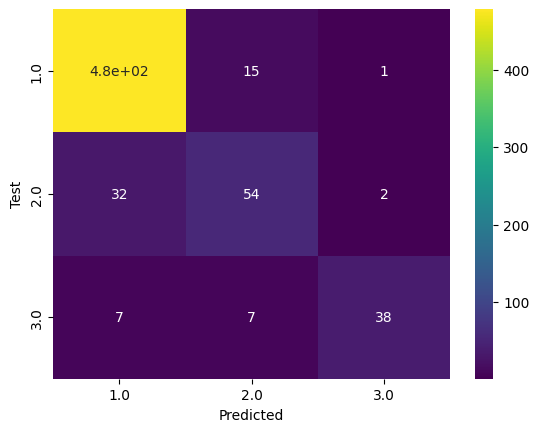

In [30]:
confusionMatrix(y_pred_2)

Naive Bayes


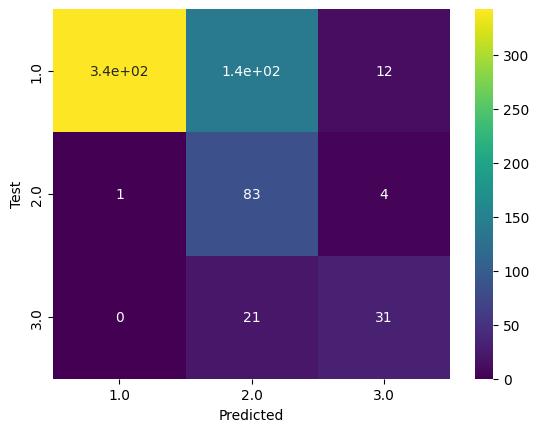

In [31]:
confusionMatrix(y_pred_3) 

Decision Tree


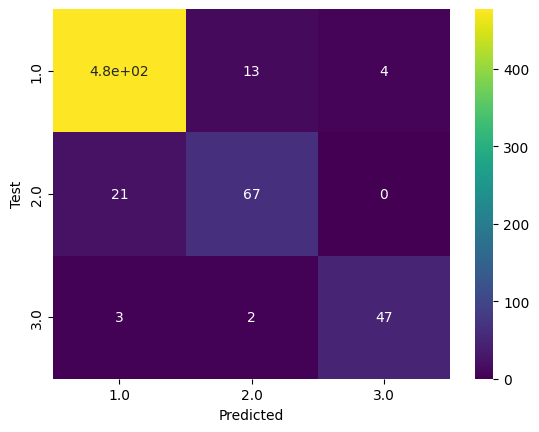

In [32]:
confusionMatrix(y_pred_4) 


Neural Network


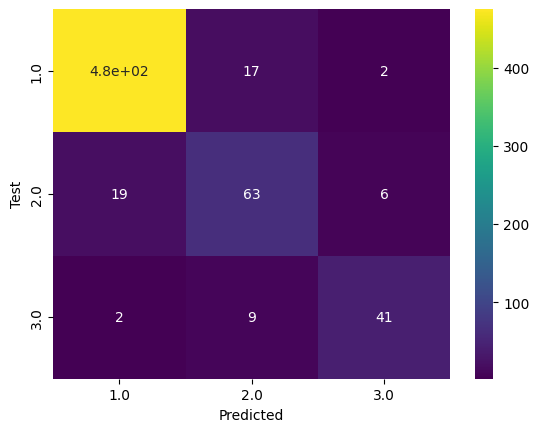

In [33]:
confusionMatrix(y_pred_5) 


Support Vector Machine


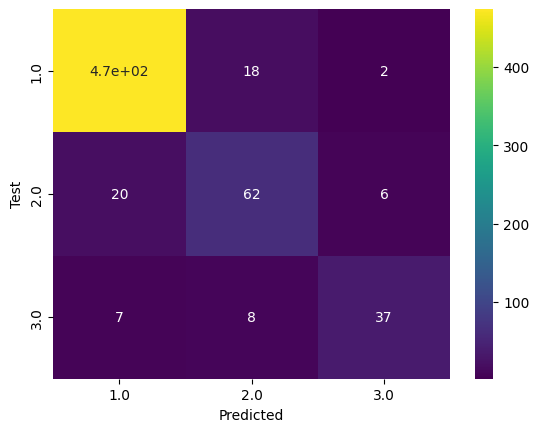

In [34]:
confusionMatrix(y_pred_6) 
